# Fly Example Parse Proof of Concept

The idea of this project is a proof of concept fly parsing model, so that we can see the parsing model at work.

First, let's start out with adding motra to our path, where we don't have it installed as a module.

In [1]:
import sys
sys.path.append("/Users/andy/Documents/colby/summer-2022/data-analysis/motra")
%load_ext autoreload
%autoreload 2

Now, let's pull in our motra library and 
our standard data science include, matplotlib.

In [2]:
import motra
from motra import MotraModel, DataframeKeys
import matplotlib.pyplot as plt

Now let's read in a single tracking file

In [3]:

simple_model = MotraModel.read_csv("WIN_20220709_20_16_20_Pro-processed-top-left.csv")

In [6]:
simple_model.scale_to_arena_size().time_distribution_by_quadrant()

quadrant,1,2,3,4
fly_id,,,,
1,0.255117,0.198229,0.474383,0.072271
2,0.226322,0.528290,0.183372,0.062015
3,0.179734,0.386247,0.375027,0.058991


In [39]:
simple_model.data

,fly id,pos x,pos y,timestamp
0,1,-14.790216,7.169646,0.000000
1,1,-14.877446,6.820724,0.033333
2,1,-16.273134,6.384572,0.066667
3,1,-16.273134,5.773959,0.100000
4,1,-16.534825,5.250576,0.133333
...,...,...,...,...
68446,3,-11.475458,-5.566001,760.400000
68447,3,-11.475458,-5.566001,760.433333
68448,3,-11.388228,-5.566001,760.466667
68449,3,-11.388228,-5.653232,760.500000


In [18]:
help(MotraModel.read_csv)

Help on function read_csv in module motra.motra_model:

read_csv(path: 'os.PathLike', setup_config: 'Optional[SetupConfig]' = None, dataframe_key_config: 'Optional[DataframeKeys]' = None) -> "'MotraModel'"
    Reads in a fly tracking file from a csv file and constructs
    a new MotraModel from the data.
    
    Parameters
    ----------
    path: the path to the fly tracking data.
    setup_config: the setup config to use, if left as none, will use the default.
    dataframe_key_config: the dataframe keys to use for the generated dataframe, if none, will use default
    
    Returns
    -------
    a motra model containing the information at the given path



<AxesSubplot:>

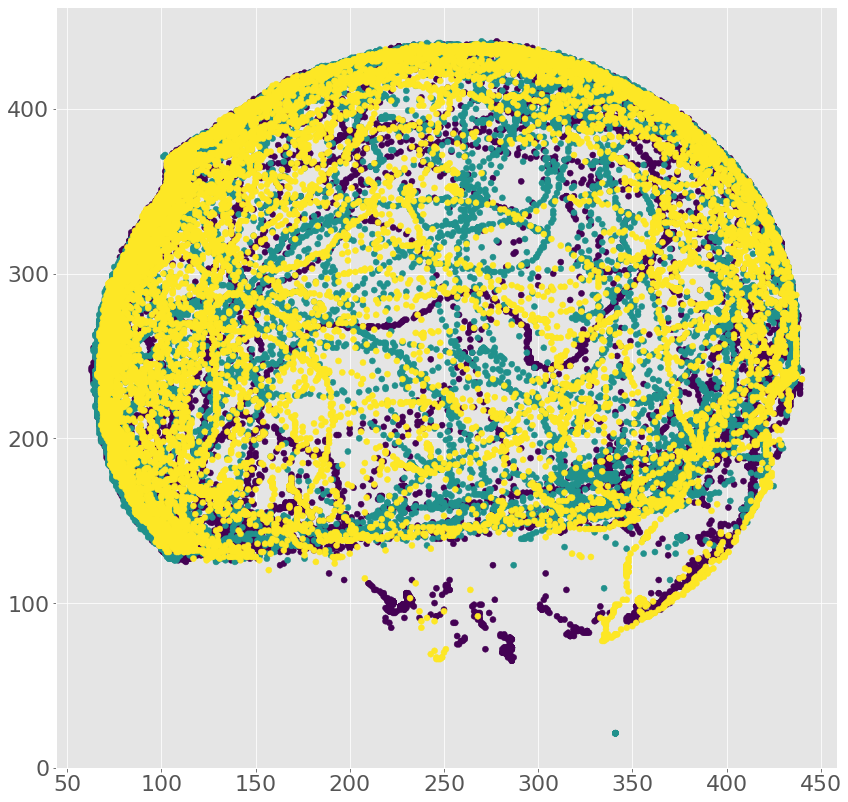

In [10]:
simple_model.plot()

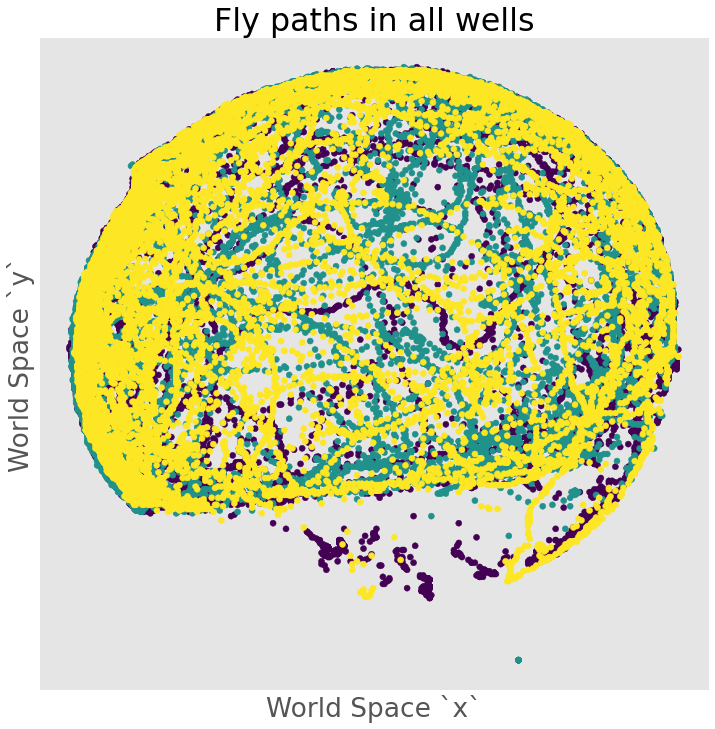

In [8]:
ax = simple_model.plot(size=12)
ax.set_title("Fly paths in all wells")
ax.set_xlabel("World Space `x`")
ax.set_ylabel("World Space `y`")
ax.set_xticks([])
ax.set_yticks([])
ax.set_xticklabels([])
ax.set_yticklabels([]);

In [5]:
quadrants = simple_model.split_up_quadrants((115, 115))

<AxesSubplot:>

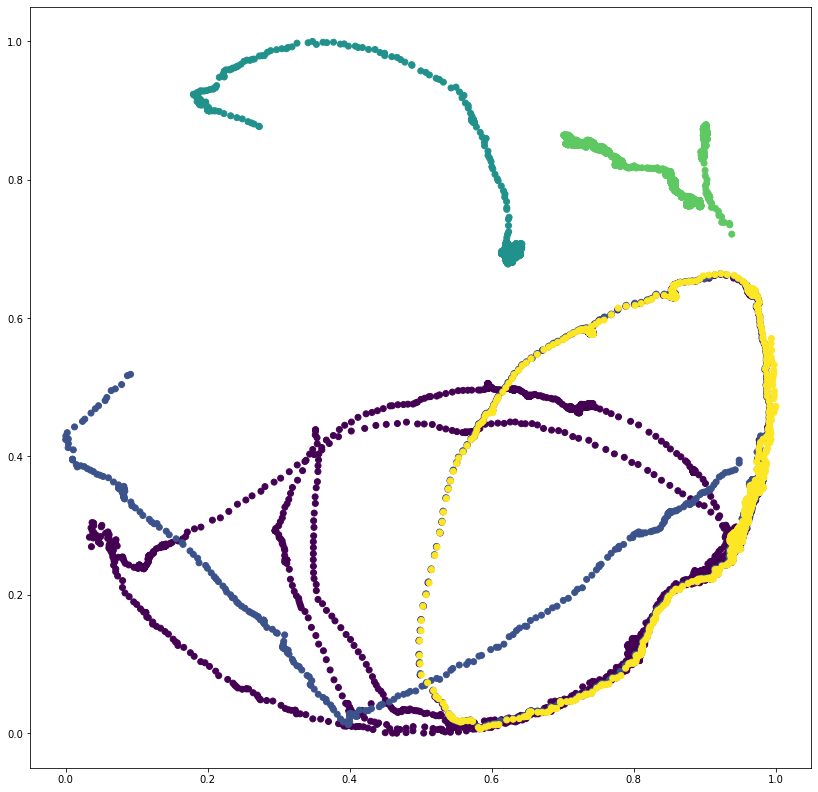

In [6]:
bottom_right_normalized = quadrants.bottom_right.normalize()
bottom_right_normalized.plot(size=14)

In [7]:
print(bottom_right_normalized.history)

1. read from blender generated csv at path: /Users/andy/Documents/colby/summer-2022/data-analysis/motra/assets/tracks.csv
2. Extracted lower right quadrant of fly model setup
3. Normalized Motra Model to Range: [0, 1]



In [8]:
simple_model.history

'1. read from blender generated csv at path: /Users/andy/Documents/colby/summer-2022/data-analysis/motra/assets/tracks.csv\n'

In [9]:
scaled = bottom_right_normalized.scale_to_arena_size()

<AxesSubplot:>

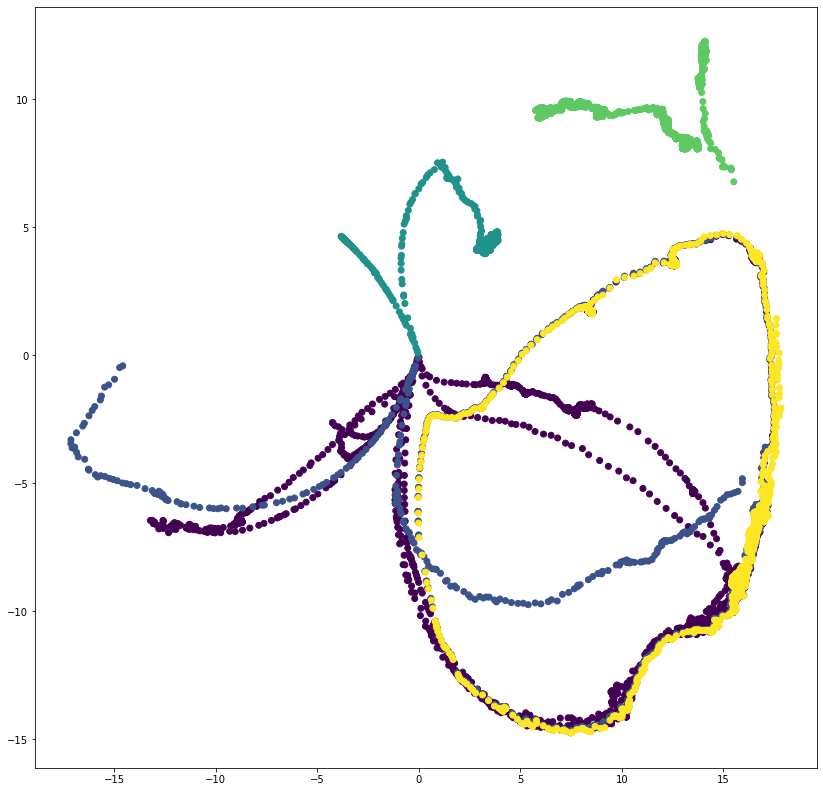

In [10]:
scaled.plot()

<AxesSubplot:title={'center':'Graph of velocity of flies vs time'}, xlabel='Seconds', ylabel='distance per second'>

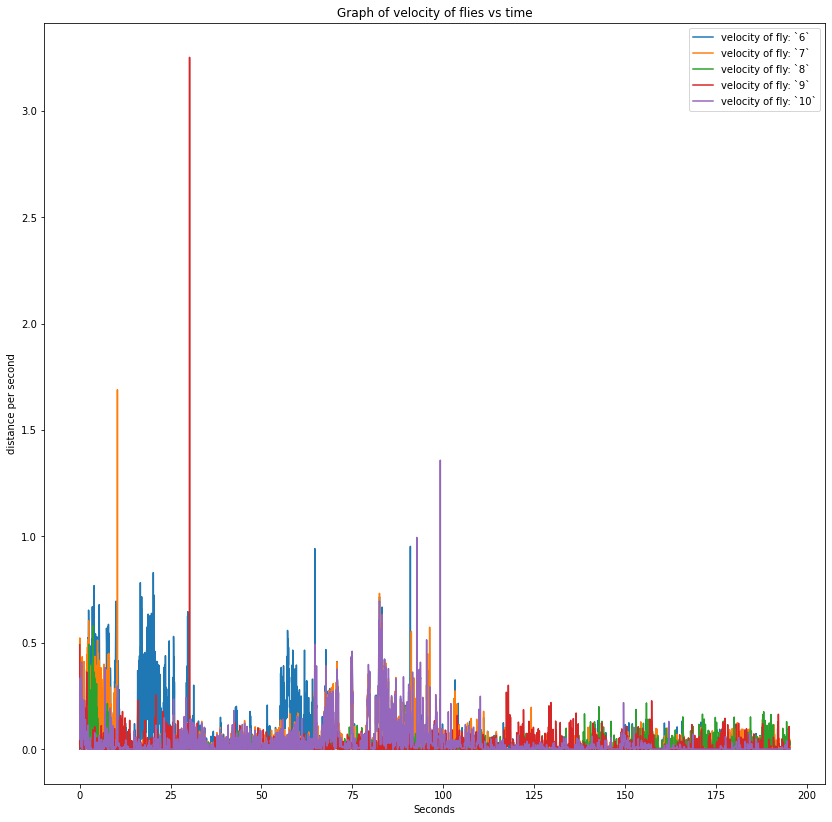

In [12]:
scaled.plot_velocity(apply_legend=True)

In [13]:
extracted = scaled.retain_only_fly_with_id(9)

<AxesSubplot:title={'center':'Graph of velocity of flies vs time'}, xlabel='Seconds', ylabel='distance per second'>

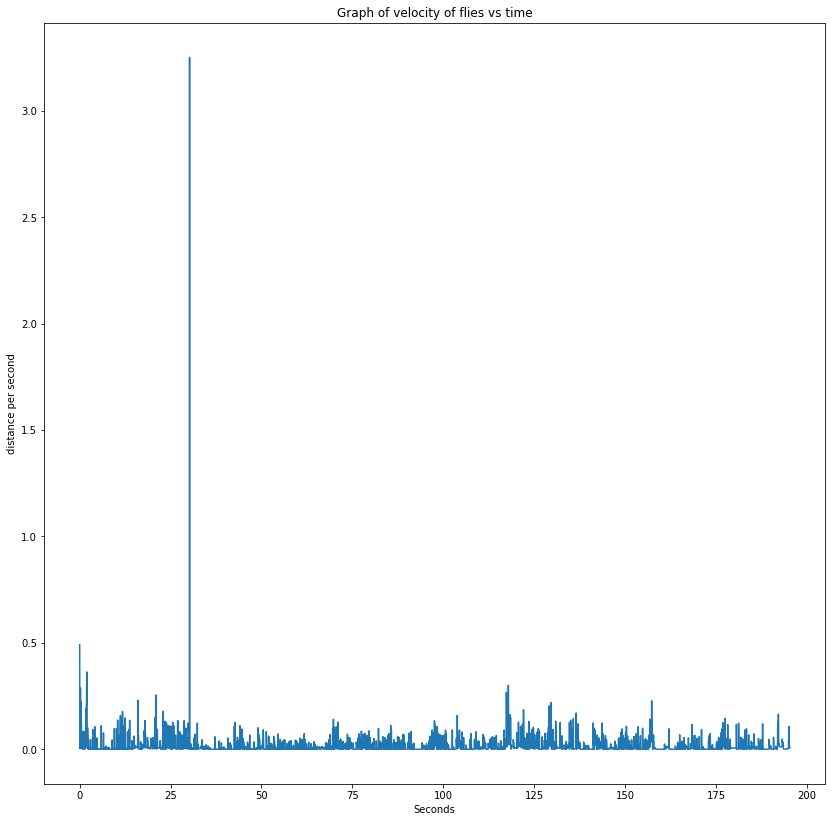

In [15]:
extracted.plot_velocity()

<AxesSubplot:>

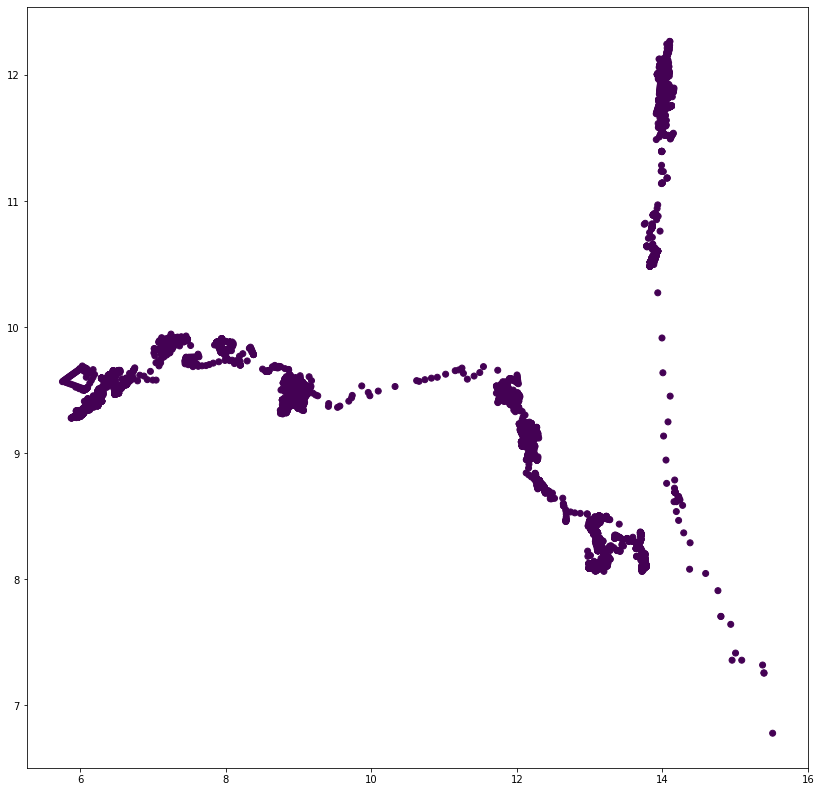

In [16]:
extracted.plot()

In [17]:
extracted.history

'1. read from blender generated csv at path: /Users/andy/Documents/colby/summer-2022/data-analysis/motra/assets/tracks.csv\n2. Extracted lower right quadrant of fly model setup\n3. Normalized Motra Model to Range: [0, 1]\n4. Scaled to arena radius: 19.0mm\n5. filtered out all flies whose id was not: `9`\n'

In [18]:
print(extracted.history)

1. read from blender generated csv at path: /Users/andy/Documents/colby/summer-2022/data-analysis/motra/assets/tracks.csv
2. Extracted lower right quadrant of fly model setup
3. Normalized Motra Model to Range: [0, 1]
4. Scaled to arena radius: 19.0mm
5. filtered out all flies whose id was not: `9`

